# Breast Cancer Tumor Detection using Logistic Regression
# Compare with KNN Regression

Consider The Wisconsin Breast Cancer Database. 

Class attribute shows the observation result, whether the patient is suffering from the benign tumor or malignant tumor. 

Benign tumors do not spread to other parts while the malignant tumor is cancerous. 

# Problem Statement:

# Model the Logistic Regression and KNN classifiers using the Breast Cancer data for predicting whether a patient is suffering from the benign tumor or malignant tumor and compare them

KNN Model for Cancerous tumor detection:

To diagnose Breast Cancer, the doctor uses his experience by analyzing details provided by

1. Patient’s Past Medical History
2. Reports of all the tests performed.

Using the modeled KNN classifier, we will solve the problem in a way similar to the procedure used by doctors. 

The modeled KNN classifier will compare the new patient’s test reports, observation metrics with the records of patients(training data) that correctly classified as benign or malignant.

In [3]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
bc_df = pd.read_csv("wisc_bc_data.csv")

In [6]:
bc_df.shape

(569, 32)

In [7]:
bc_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [8]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                   569 non-null int64
diagnosis            569 non-null object
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se    

In [9]:
bc_df.isna().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [10]:
bc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


drop the first column from the data frame. This is Id column which is not used in modeling

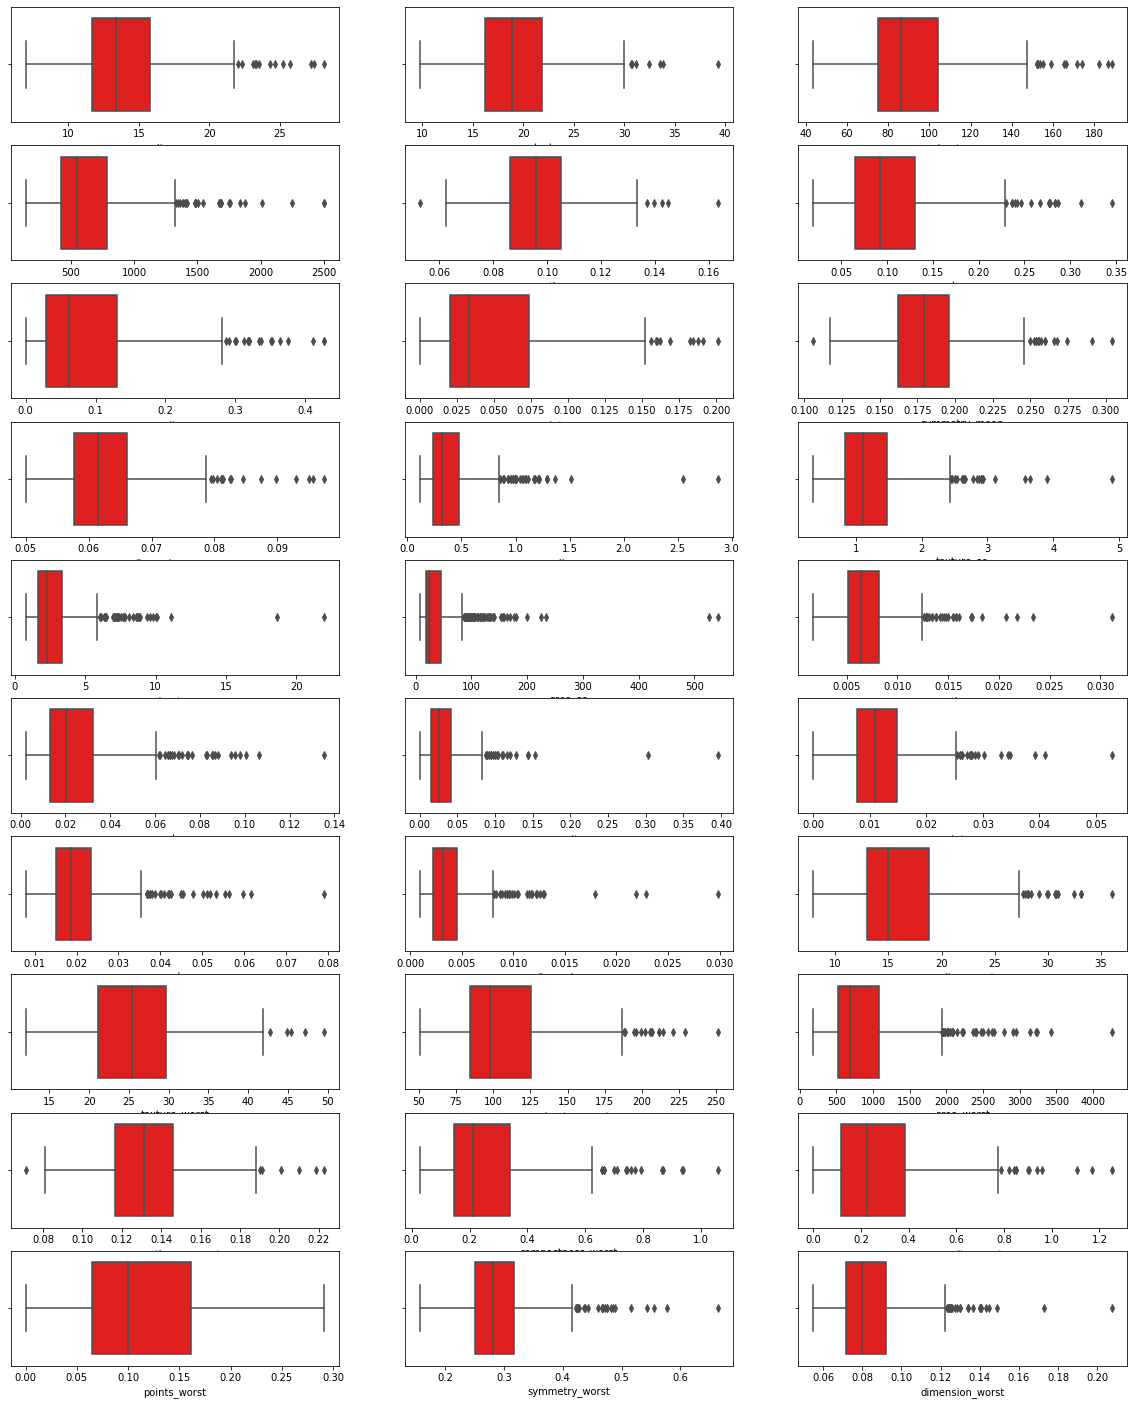

In [14]:
fig, ax = plt.subplots(10,3, figsize=(20,25))
for col,subplot in zip(bc_df.columns.drop('diagnosis'), ax.flatten()):
    sns.boxplot(col, data= bc_df, ax=subplot, color='red')
plt.show()

- There are lot of outliers in all the columns
- We will not impute the outliers as the datpoints are few

In [15]:
bc_df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

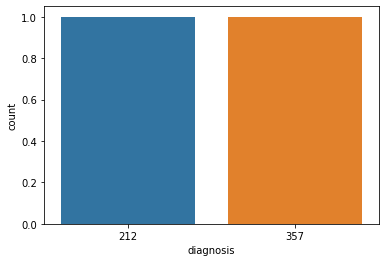

In [16]:
sns.countplot(bc_df.diagnosis.value_counts())
plt.show()

Next step: separate bc_df into X(feature set) and y(target variable)

In [17]:
# Create a separate dataframe consisting only of the features i.e independent attributes
X = bc_df.drop(labels= "diagnosis" , axis = 1)

In [18]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

X = X.apply(zscore)  # convert all attributes to Z scale 

In [19]:
X.sample(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
277,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
554,-0.260524,1.387014,-0.324127,-0.332729,-0.601368,-0.990992,-0.766849,-0.728400,-0.703240,-0.986314,...,-0.397431,1.392767,-0.475716,-0.435405,-0.152049,-0.941264,-0.638975,-0.830706,-0.738931,-0.890300
491,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
497,-0.271884,0.586503,-0.269756,-0.350931,0.055489,0.006804,-0.077958,0.092880,-0.239570,-0.145674,...,-0.008116,0.686025,-0.052459,-0.245902,0.786039,0.866009,0.482686,0.701851,1.281677,0.677967
306,0.310345,2.636649,0.470844,0.176365,0.600616,1.977758,2.086645,1.170295,1.155090,1.236490,...,0.259021,2.786709,0.638572,0.060502,0.409050,3.418837,4.307272,1.842324,1.922319,3.156163


In [20]:
# Capture the class values from the 'diagnosis' column into a pandas series akin to array 
y = bc_df[["diagnosis"]]

In [65]:
y.sample(5)

,diagnosis
253,M
479,M
126,M
243,M
524,B


In [21]:
y = pd.get_dummies(y, drop_first=True)

In [22]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=test_size, random_state=seed)

In [23]:
X_train.shape, y_train.shape

((398, 30), (398,))

In [24]:
X_test.shape, y_train.shape

((171, 30), (398,))

In [25]:
y_train[0:5]

array([1, 1, 1, 0, 0], dtype=uint8)

In [90]:
y_test[0:5]

array([0, 0, 1, 1, 1], dtype=uint8)

### Finding Optimal k

In [26]:
X_train.shape[0]

398

In [27]:
int(np.sqrt(X_train.shape[0]))

19

In [28]:
maxK = int(np.sqrt(X_train.shape[0]))

In [29]:
optimalK = 1
optimalTrainAccuracy = 0

In [30]:
for k_i in range(maxK):
    if(((k_i % 2) != 0) & (k_i > 1)):
        NNH = KNeighborsClassifier(n_neighbors=k_i)
        NNH.fit(X_train, y_train)
        if(NNH.score(X_train, y_train) > optimalTrainAccuracy):
            optimalK = k_i
            optimalTrainAccuracy = NNH.score(X_train, y_train)
print((optimalK, optimalTrainAccuracy))

(3, 0.9849246231155779)


In [31]:
NNH = KNeighborsClassifier(n_neighbors=3)
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [32]:
NNH.score(X_train, y_train)

0.9849246231155779

In [33]:
NNH.score(X_test, y_test)

0.9649122807017544

In [58]:
predicted_values_knn = NNH.predict(X_test)

In [59]:
# Test Confusion matrix
confusion_matrix(y_test, predicted_values_knn)

array([[108,   1],
       [  5,  57]], dtype=int64)

In [60]:
print(classification_report(y_test, predicted_values_knn))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       109
           1       0.98      0.92      0.95        62

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



- The KNN model is performing well with good train and test acuracy. The model s not an overfit model

In [39]:
logreg = LogisticRegression(random_state=7)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
logreg.score(X_train,y_train)

0.992462311557789

In [52]:
logreg.score(X_test,y_test)

0.9707602339181286

In [47]:
predicted_values_logreg = logreg.predict(X_test)

In [49]:
predicted_log_proba = logreg.predict_log_proba(X_test)

In [53]:
predicted_proba = logreg.predict_proba(X_test)

In [54]:
confusion_matrix(y_test, predicted_values_logreg)

array([[108,   1],
       [  4,  58]], dtype=int64)

In [57]:
print(classification_report(y_test, predicted_values_logreg))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       109
           1       0.98      0.94      0.96        62

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



- The Logistic Regression model is performing well with good train and test acuracy. The model s not an overfit model

- Both KNN and LogReg models are performing very well on the dataset, with very good train and test accuracies